# Assignment: Linear Models
## Do two questions in total: "Q1+Q2" or "Q1+Q3"
### `! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is 
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

<img src="./photos/question_1_1.jpeg" width=600>
<img src="./photos/question_1_2.jpeg" width=600>
<img src="./photos/question_1_3.jpeg" width=600>
<img src="./photos/question_1_4.jpeg" width=600>
<img src="./photos/question_1_5.jpeg" width=600>
<img src="./photos/question_1_6.jpeg" width=600>

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by how much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

### 1.

In [400]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_cars = pd.read_csv("./data/cars_hw.csv")

# first column has no name
df_cars.columns.values[0] = "id"

# replace 1st 2nd 3rd with integers
df_cars["No_of_Owners"] = df_cars["No_of_Owners"].map({
    "1st": 1,
    "2nd": 2,
    "3rd": 3
})

# convert make year column to age
df_cars["age"] = max(df_cars["Make_Year"])-df_cars["Make_Year"]


df_cars.head()

,id,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price,age
0,1,Volkswagen,2017,silver,sedan,44611,1,5,diesel,7-Speed,Automatic,657000,5
1,2,Hyundai,2016,red,crossover,20305,1,5,petrol,5-Speed,Manual,682000,6
2,3,Honda,2019,white,suv,29540,2,5,petrol,5-Speed,Manual,793000,3
3,4,Renault,2017,bronze,hatchback,35680,1,5,petrol,5-Speed,Manual,414000,5
4,5,Hyundai,2017,orange,hatchback,25126,1,5,petrol,5-Speed,Manual,515000,5


<Axes: xlabel='Mileage_Run', ylabel='Price'>

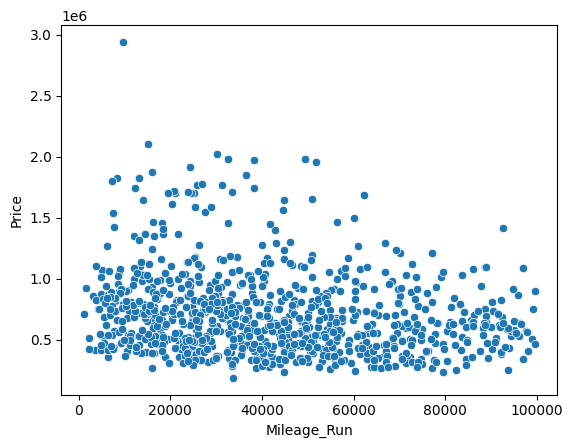

In [401]:
sns.scatterplot(data=df_cars, x="Mileage_Run", y="Price")

<Axes: xlabel='mileage_ihs', ylabel='price_ihs'>

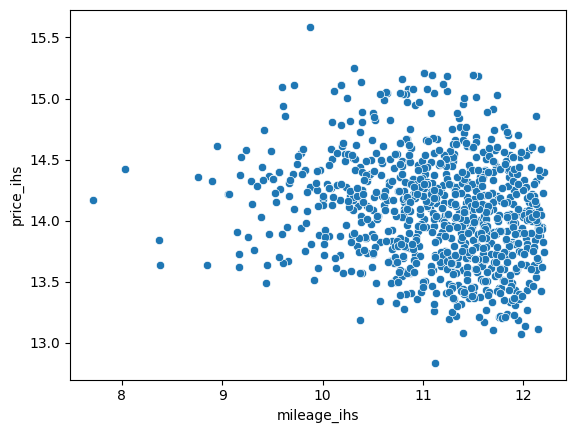

In [402]:
# scaled using arcsinh
df_cars['price_ihs'] = np.arcsinh(df_cars['Price'])
df_cars['mileage_ihs'] = np.arcsinh(df_cars['Mileage_Run'])
sns.scatterplot(data=df_cars, x="mileage_ihs", y="price_ihs")

count    976.000000
mean      14.104181
std        0.450276
min       12.837344
25%       13.765795
50%       14.102942
75%       14.384228
max       15.587407
Name: price_ihs, dtype: float64

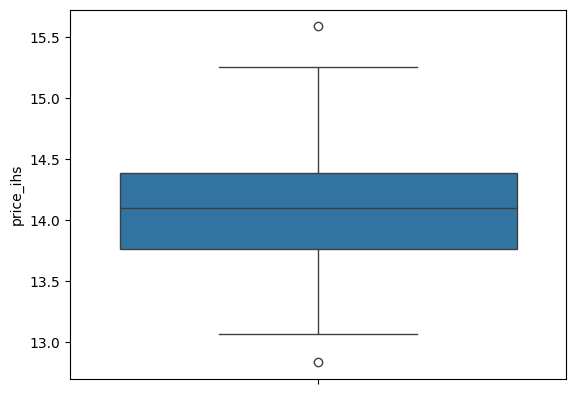

In [403]:
sns.boxplot(data=df_cars, y="price_ihs")
df_cars["price_ihs"].describe()

count    976.000000
mean      11.109435
std        0.733389
min        7.711549
25%       10.722241
50%       11.227119
75%       11.651317
max       12.201010
Name: mileage_ihs, dtype: float64

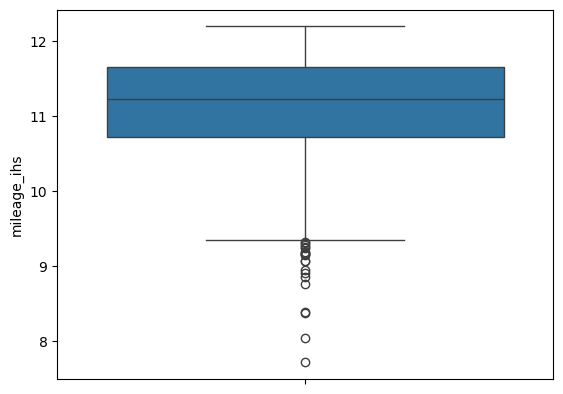

In [404]:
sns.boxplot(data=df_cars, y="mileage_ihs")
df_cars["mileage_ihs"].describe()

<Axes: xlabel='mileage_ihs', ylabel='price_ihs'>

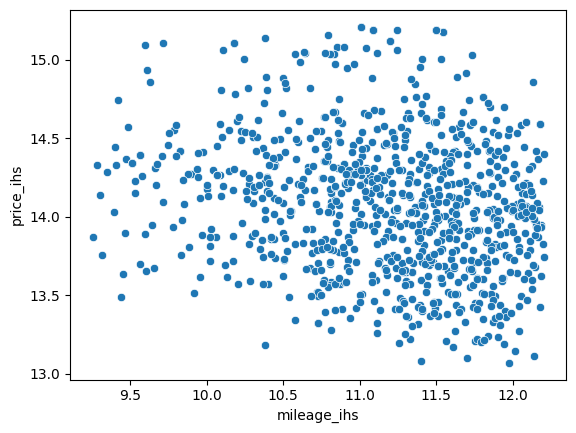

In [405]:
# remove price outliers above 15.25 and below 13
df_cars = df_cars.loc[df_cars['price_ihs']<15.25,:]
df_cars = df_cars.loc[df_cars['price_ihs']>13,:]

# remove mileage outliers below 9.25
df_cars = df_cars.loc[df_cars['mileage_ihs']>9.25,:]

sns.scatterplot(data=df_cars, x="mileage_ihs", y="price_ihs")

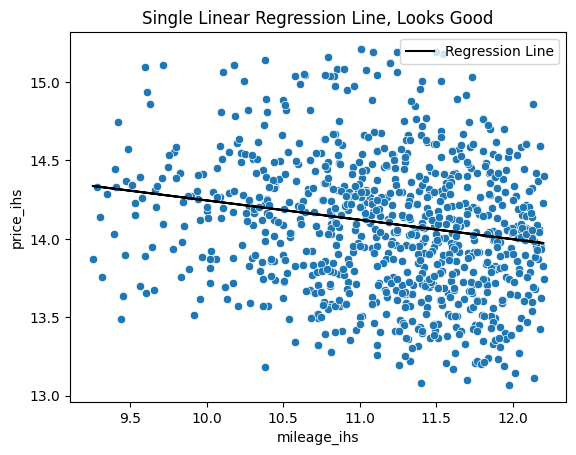

In [406]:
def slr(x,y): 
    """ Single linear regression function. """
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x-x_bar,y-y_bar)/np.inner(x-x_bar,x-x_bar)
    b0 = y_bar - b1*x_bar
    y_hat = b0 + b1*x
    residuals = y - y_hat
    return({'b0':b0,'b1':b1,'y_hat':y_hat,'residuals':residuals})

x = df_cars['mileage_ihs']
y = df_cars['price_ihs']
reg = slr(x,y)

fig = sns.scatterplot(data=df_cars, x="mileage_ihs", y="price_ihs")
fig.set(title="Single Linear Regression Line, Looks Good")
plt.plot(x,reg['y_hat'],label='Regression Line',color='black')
plt.legend(loc='upper right')
plt.show()

### 2.
Looking at the grouped kernel density plot, we can see that the overall price density distribution is right-skewed. The majority of car brands fall under 1,000,000, with MG Motors being the rare exception and the most expensive car brand. These cars appear to fall between 1.5-2 million, which is much higher than the rest of the other makes.

count    9.570000e+02
mean     7.380909e+05
std      3.596796e+05
min      2.370000e+05
25%      4.760000e+05
50%      6.630000e+05
75%      8.820000e+05
max      2.019000e+06
Name: Price, dtype: float64


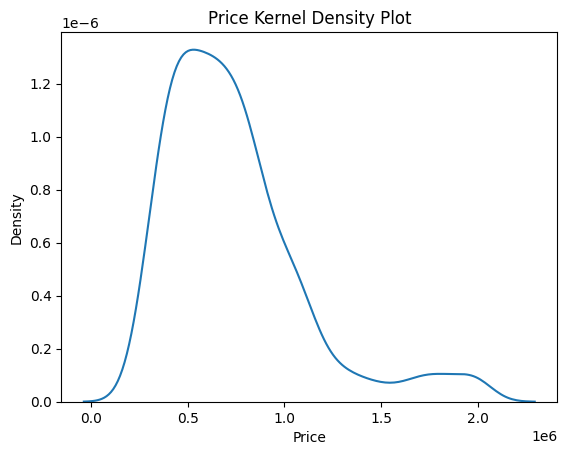

In [407]:
print(df_cars["Price"].describe())

fig = sns.kdeplot(df_cars["Price"])
fig.set(title="Price Kernel Density Plot",
xlabel="Price",
ylabel="Density")
plt.show()

In [408]:
df_cars.loc[:,["Price", "Make",]].groupby(["Make"]).describe()

Price                                                     \
               count          mean            std        min        25%   
Make                                                                      
Chevrolet        6.0  4.535000e+05  246606.366503   267000.0   288500.0   
Datsun           3.0  2.896667e+05   10503.967504   279000.0   284500.0   
Ford            52.0  7.211731e+05  140927.699605   290000.0   635000.0   
Honda           73.0  7.989726e+05  266509.066586   316000.0   581000.0   
Hyundai        302.0  6.910298e+05  280321.864909   248000.0   484250.0   
Jeep             4.0  1.499500e+06  152513.387391  1290000.0  1447500.0   
Kia              8.0  1.614750e+06  119056.709177  1369000.0  1579000.0   
MG Motors       35.0  1.869457e+06  121661.135671  1589000.0  1786500.0   
Mahindra        18.0  1.100167e+06  175549.305961   796000.0  1037000.0   
Maruti Suzuki  286.0  5.887867e+05  216320.165492   237000.0   410000.0   
Nissan           2.0  6.800000e+05  289913.780286   475000.0   577500.0   
Renault         67.0  6.663134e+05  214206.726046   287000.0   479500.0   
Skoda            4.0  6.847500e+05  411730.797974   436000.0   458500.0   
Tata            18.0  1.076389e+06  536096.472759   239000.0   776750.0   
Toyota          50.0  8.003400e+05  246689.973986   368000.0   526250.0   
Volkswagen      29.0  6.058276e+05  119831.151735   402000.0   542000.0   

                                                
                     50%        75%        max  
Make                                            
Chevrolet       345500.0   537500.0   892000.0  
Datsun          290000.0   295000.0   300000.0  
Ford            707500.0   787000.0  1066000.0  
Honda           785000.0   915000.0  1537000.0  
Hyundai         636500.0   836750.0  1742000.0  
Jeep           1529500.0  1581500.0  1649000.0  
Kia            1628500.0  1705750.0  1741000.0  
MG Motors      1848000.0  1978000.0  2019000.0  
Mahindra       1094500.0  1157000.0  1465000.0  
Maruti Suzuki   527500.0   764000.0  1163000.0  
Nissan          680000.0   782500.0   885000.0  
Renault         651000.0   803000.0  1164000.0  
Skoda           502000.0   728250.0  1299000.0  
Tata            870000.0  1618500.0  1972000.0  
Toyota          894000.0  1023000.0  1092000.0  
Volkswagen      607000.0   699000.0   790000.0

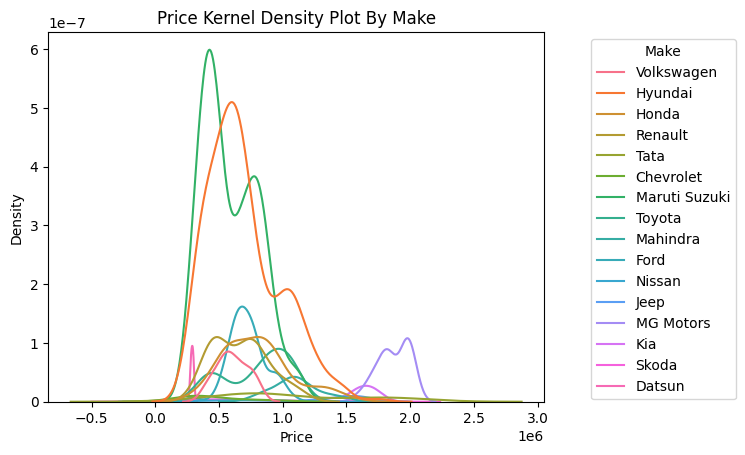

In [409]:
fig = sns.kdeplot(data=df_cars, x="Price", hue="Make")
fig.set(title="Price Kernel Density Plot By Make",
xlabel="Price",
ylabel="Density")
sns.move_legend(fig, "upper right", bbox_to_anchor=(1.4, 1))
plt.show()

### 3.

In [410]:
from sklearn.model_selection import train_test_split

y = df_cars['price_ihs']

vars = ["Make", "Color",
        "Body_Type", "No_of_Owners", 
        "Seating_Capacity", "Fuel_Type", 
        "Transmission", "Transmission_Type", 
        "age", "mileage_ihs"]

X = df_cars.loc[:,vars]

X_train, X_test, y_train, y_test = train_test_split(
                                                    X, y, 
                                                    test_size=0.2, 
                                                    random_state=65)

### 4.
After outputting the R^2 and RMSE for each test and training set for each model, we can see an increase in R^2 and decrease in RMSE as the number of variables/features increase. Of the three models, the combined model performs the best, where both the training and testing set have an R^2 of 0.83-0.84, meaning the model explains about 83-84% of the variance in the data. RMSE for both sets also lie around 0.18, meaning we have less error and stronger performance in our predictions. Overall, the joint model performs about 94% better than the numeric model and 17% better than the categorical model.

In [411]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

num_vars = ["age", "mileage_ihs"]

# training and testing numerical variables
X_train_num = X_train[num_vars]
X_test_num = X_test[num_vars]

model_num = LinearRegression()
model_num.fit(X_train_num, y_train)

y_train_pred_num = model_num.predict(X_train_num)
y_test_pred_num = model_num.predict(X_test_num)

r2_train_num = r2_score(y_train, y_train_pred_num)
rmse_train_num = np.sqrt(mean_squared_error(y_train, y_train_pred_num))

r2_test_num = r2_score(y_test, y_test_pred_num)
rmse_test_num = np.sqrt(mean_squared_error(y_test, y_test_pred_num))

print("Numeric Variables Model")
print("Training R^2:", r2_train_num)
print("Training RMSE:", rmse_train_num)
print("Testing R^2:", r2_test_num)
print("Testing RMSE:", rmse_test_num)

Numeric Variables Model
Training R^2: 0.4097859188811296
Training RMSE: 0.3394265591847559
Testing R^2: 0.4333615808918069
Testing RMSE: 0.34913876896383905


In [412]:
categorical_vars = ["Make", "Color", "Body_Type", "No_of_Owners", 
                    "Seating_Capacity", "Fuel_Type", "Transmission", "Transmission_Type"]

X_train_cat = pd.get_dummies(X_train[categorical_vars], drop_first=True)
X_test_cat = pd.get_dummies(X_test[categorical_vars], drop_first=True)

X_train_cat, X_test_cat = X_train_cat.align(X_test_cat, join='left', axis=1, fill_value=0)

model_cat = LinearRegression()
model_cat.fit(X_train_cat, y_train)

y_train_pred_cat = model_cat.predict(X_train_cat)
y_test_pred_cat = model_cat.predict(X_test_cat)

# use the built in r2_score() function instead of .score()
r2_train_cat = r2_score(y_train, y_train_pred_cat)
rmse_train_cat = np.sqrt(mean_squared_error(y_train, y_train_pred_cat))

r2_test_cat = r2_score(y_test, y_test_pred_cat)
rmse_test_cat = np.sqrt(mean_squared_error(y_test, y_test_pred_cat))

print("Categorical Variables Model")
print("Training R^2:", r2_train_cat)
print("Training RMSE:", rmse_train_cat)
print("Testing R^2:", r2_test_cat)
print("Testing RMSE:", rmse_test_cat)

Categorical Variables Model
Training R^2: 0.6878823296973067
Training RMSE: 0.24683129212358557
Testing R^2: 0.7146496228923334
Testing RMSE: 0.24776176897230778


In [413]:
X_train_all = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_all = pd.concat([X_test_num, X_test_cat], axis=1)

model_all = LinearRegression()
model_all.fit(X_train_all, y_train)

y_train_pred_all = model_all.predict(X_train_all)
y_test_pred_all = model_all.predict(X_test_all)

r2_train_all = r2_score(y_train, y_train_pred_all)
rmse_train_all = np.sqrt(mean_squared_error(y_train, y_train_pred_all))

r2_test_all = r2_score(y_test, y_test_pred_all)
rmse_test_all = np.sqrt(mean_squared_error(y_test, y_test_pred_all))

print("Combined Model")
print("Training R^2:", r2_train_all)
print("Training RMSE:", rmse_train_all)
print("Testing R^2:", r2_test_all)
print("Testing RMSE:", rmse_test_all)

Combined Model
Training R^2: 0.8332622987436267
Training RMSE: 0.1804088936648848
Testing R^2: 0.839352015377415
Testing RMSE: 0.18590142059227402


### 5.
On the test set, the R^2 value increases and RMSE value decreases marginally as we increase the degress of the expansion. This pattern only continues until we reach degree 3, after which both values head in the opposite direction, with R^2 decreasing and RMSE increasing. The best test model with expanded features is at degree = 3, where R^2 = 0.4425 and RMSE = 0.3463. This is still outperformed by our best model from part 4, which was the joint model with a testing R^2 of 0.8394 and testing RMSE of 0.1859

In [414]:
from sklearn.preprocessing import PolynomialFeatures

max_degree = 10  # pick degrees 1-10
results = []

for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    
    X_train_poly = poly.fit_transform(X_train_num)
    # do not fit transform test set to avoid data leakage
    X_test_poly = poly.transform(X_test_num)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    r2_test = r2_score(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    results.append({
        "degree": degree,
        "r2_train": r2_train,
        "rmse_train": rmse_train,
        "r2_test": r2_test,
        "rmse_test": rmse_test
    })

df_results = pd.DataFrame(results)
df_results

,degree,r2_train,rmse_train,r2_test,rmse_test
0,1,0.409786,0.339427,0.433362,0.349139
1,2,0.419399,0.336651,0.434267,0.348860
2,3,0.424734,0.335101,0.437734,0.347789
3,4,0.432514,0.332827,0.442535,0.346301
4,5,0.438615,0.331033,0.440355,0.346978
5,6,0.443188,0.329682,0.433043,0.349237
6,7,0.450121,0.327623,0.412195,0.355600
7,8,0.457316,0.325473,0.404480,0.357926
8,9,0.461552,0.324200,0.427507,0.350938
9,10,0.467937,0.322272,0.377346,0.365989


### 6.
Plotting the best model's predicted values against the actual values show a definite linear relationship, which is what we want and an indicator of strong performance. At the same time, the residuals for the test data form a rough bell shape around 0 when plotted as a kernel density plot. This is another indicator of a flexible model, as errors are shown to be unbiased. Some strengths of this model are its predictive power, as demonstrated by the low difference between R^2 and RMSE, as well as good feature representation (both numerical and categorical features with one-hot encoding). Some weakenesses of this model include potential feature interaction gaps such as make vs. mileage that may over overshadowed by other dominant interactions. Our RMSE could also be reduced further, as there remains unexplained variance.

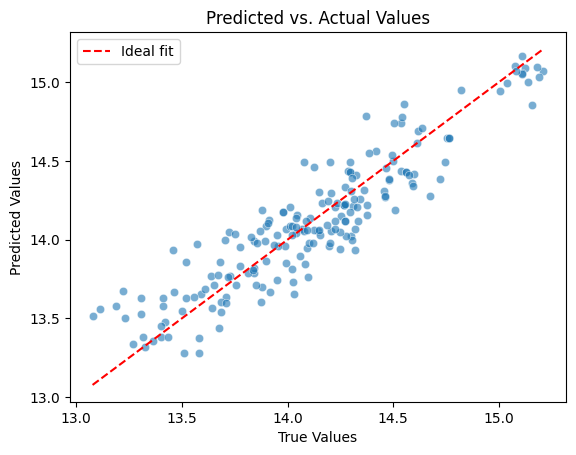

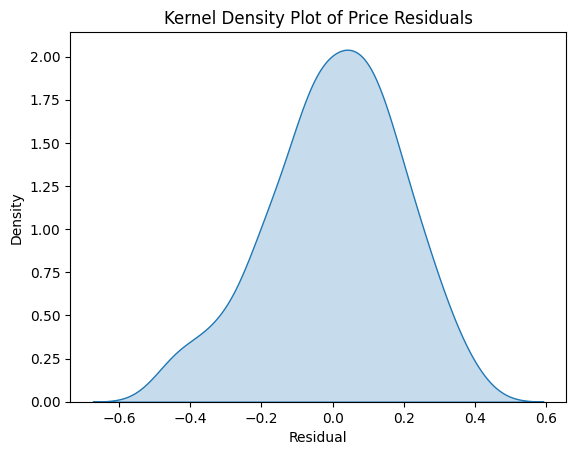

In [415]:
# combined model is best performing model so far
fig = sns.scatterplot(x=y_test, y=y_test_pred_all, alpha=0.6)
fig = sns.lineplot(x=[y_test.min(), y_test.max()],
             y=[y_test.min(), y_test.max()],
             color='red', linestyle='--', label='Ideal fit')
fig.set(title="Predicted vs. Actual Values",
xlabel="True Values",
ylabel="Predicted Values")
plt.legend()
plt.show()

residuals = y_test - y_test_pred_all
fig = sns.kdeplot(residuals, fill=True)
fig.set(title="Kernel Density Plot of Price Residuals",
xlabel="Residual",
ylabel="Density")
plt.show()

**Q3.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

### 1.

In [416]:
df_heart = pd.read_csv("./data/heart_hw.csv")

proportion_control = df_heart.loc[df_heart['transplant'] == 'control', 'y'].mean()
proportion_treatment = df_heart.loc[df_heart['transplant'] == 'treatment', 'y'].mean()
ATE = proportion_treatment - proportion_control

print("Proportion who survive (control): ", proportion_control)
print("Proportion who survive (treatment): ", proportion_treatment)
print("Average treatment effect: ", ATE)


Proportion who survive (control):  0.11764705882352941
Proportion who survive (treatment):  0.34782608695652173
Average treatment effect:  0.23017902813299232


### 2.
The coefficient of the regression matches our average treatment effect, while our intercept matches the proportion of survivors in the control group. These values align because our intercept represents the mean outcome for the control group. In other words, it is the proportion of people who survive in the control group. The coefficient is the difference in the mean outcome between both groups, which is why it aligns with the average treatment effect.

In [417]:
model = LinearRegression(fit_intercept=True)
y = df_heart["y"]
# 1 is treatment, 0 is control
X = (df_heart['transplant'] == 'treatment').astype(int)
X = X.values.reshape(-1, 1)

model.fit(X, y)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 0.11764705882352941
Coefficients: [0.23017903]


### 3.
When regressing with age as well, we see the intercept becomes 0.702. This is expected survival proportion for individuals in the control group at age = 0. The intercept dramatically increases and confirms the negative correlation between age and survival.

In [418]:
model = LinearRegression(fit_intercept=True)

y = df_heart["y"]

# 1 is treatment, 0 is control
transplant = (df_heart['transplant'] == 'treatment').astype(int)
age = df_heart['age']

X = pd.DataFrame({
    'transplant': transplant,
    'age': age
})

model.fit(X, y)
print("Features:", X.columns.tolist())
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Features: ['transplant', 'age']
Intercept: 0.7019569721740947
Coefficients: [ 0.26470169 -0.01360722]


### 4.
To build this model, we can use polynomial regression degrees, as in section 2. When plotting the R^2 and RMSE for each degree, we can see that degree = 4 maximizes our R^2 value while minimizing our RMSE. We want to use this degree in our model to transform and predict survival likelihoods. When plotting these likelihoods grouped by treatment, we can immediately see the impact of the treatment on survival likelihoods with age. Individuals over the age of 40 with the treatment are expected to survive over half the time, whereas those in the control only have a ~25% survival rate. Both groups experience a major dip in survival likelihood after age 40, likely due to a multitude of aging and health factors.

In [419]:
y = df_heart['y']

# 1 is treatment, 0 is control
transplant = (df_heart['transplant'] == 'treatment').astype(int)
age = df_heart['age']

X = pd.DataFrame({
    'transplant': transplant,
    'age': age
})

X_train, X_test, y_train, y_test = train_test_split(
                                                    X, y, 
                                                    test_size=0.2, 
                                                    random_state=65)

max_degree = 10  # pick degrees 1-10
results = []

for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    
    X_train_poly = poly.fit_transform(X_train)
    # do not fit transform test set to avoid data leakage
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    r2_test = r2_score(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    results.append({
        "degree": degree,
        "r2_train": r2_train,
        "rmse_train": rmse_train,
        "r2_test": r2_test,
        "rmse_test": rmse_test
    })

df_results = pd.DataFrame(results)
df_results

,degree,r2_train,rmse_train,r2_test,rmse_test
0,1,0.115576,0.416681,0.243046,0.393040
1,2,0.148385,0.408879,0.282690,0.382609
2,3,0.172956,0.402937,0.253631,0.390282
3,4,0.178516,0.401581,0.233581,0.395490
4,5,0.195405,0.397431,0.263534,0.387684
5,6,0.250978,0.383460,0.231083,0.396134
6,7,0.240340,0.386174,0.231371,0.396059
7,8,0.223664,0.390389,0.229663,0.396499
8,9,0.216330,0.392229,0.217405,0.399642
9,10,0.228973,0.389052,0.219845,0.399018


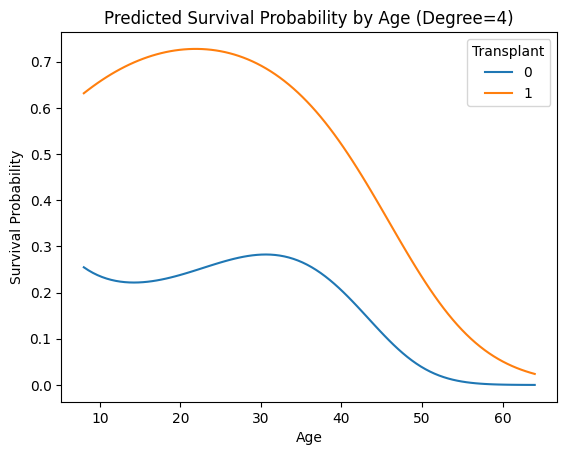

In [420]:
from sklearn.linear_model import LogisticRegression

# pick best degree that maximizes R^2 and minimizes RMSE
best_degree = 4
# refit model with this degree
poly = PolynomialFeatures(degree=best_degree, include_bias=False)
X_poly = poly.fit_transform(X)
# LogisticRegression bounds our probabilities to [0, 1], as opposted to LinearRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_poly, y)

# x-axis range, 100 partitions between max and min age in dataset
age_range = np.linspace(X['age'].min(), X['age'].max(), 100)

pred_data = pd.DataFrame({
    # first len(age_range) rows are transplant = 0, second block is transplant = 1
    'transplant': np.repeat([0, 1], len(age_range)),
    # repeats age_range twice (for treatment = 0 and treatment = 1)
    'age': np.tile(age_range, 2),
})

# now transform and predict survival likelihood
pred_poly = poly.transform(pred_data)
pred_survival = model.predict_proba(pred_poly)[:, 1]

pred_data['predicted_survival'] = pred_survival

fig = sns.lineplot(data=pred_data, x='age', y='predicted_survival', hue='transplant')
fig.set(title=f"Predicted Survival Probability by Age (Degree={best_degree})",
xlabel="Age",
ylabel="Survival Probability")
plt.legend(title="Transplant")
plt.show()

### 5.
Using these kinds of models to determine who receives organ transplants definitely raises ethical concerns for me. For one, biased/unrepresentative data could favor certain groups, or complex models could be difficult to interpret and decide who receives transplants. If these considerations are not taken into account, deploying such models would risk things such as discrimination and a lack of human accountability for these life-changing decisions. So any potential attempts to use these systems should emphasize data transparency, human review, and constant validation of results to ensure they remain accurate, fair, and ethical.